# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





## **Import Libraries and Load Dataset**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset

df = pd.read_csv('/content/drive/My Drive/AlmaBetter/Superstore Marketing Data.csv')
df

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,########,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,########,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0


In [ ]:
df.shape

(2240, 22)

In [ ]:
# Display top few rows of dataset.
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
# Display all columns of dataset.
df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [ ]:
# Check the structure of Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# Check the summary of Statistics

df.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**

In [ ]:
# Chacking for Missing Values

df.isnull().sum()

,0
Id,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
# Handle missing value in the Income colomn

df['Income'].fillna(df['Income'].median(), inplace=True)

<ipython-input-11-97b11a3b0d8b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)


In [ ]:
# Counting the number of unwanted string in the ['Dt_Customer'] column.

unwanted_string = df['Dt_Customer'] == '########'
print(unwanted_string.sum())

916


In [ ]:
# Replacing the string value with Na

df['Dt_Customer'].replace('########', np.nan, inplace=True)

<ipython-input-13-71de2d1329c0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dt_Customer'].replace('########', np.nan, inplace=True)


In [ ]:
# Counting the number of unwanted string after the replacing with Nan in the ['Dt_Customer'] column.

unwanted_string = df['Dt_Customer'] == '########'
print(unwanted_string.sum())

0


In [ ]:
# Calculate the percentage of null value in each columns.

null_percentage = (df.isnull().sum() / len(df)) * 100

# Create a new Dataframe to display the null percentage of each columns.

null_percentage_df = pd.DataFrame(null_percentage, columns=['Null Percentage'])

# Display the null percentage of each columns.
print(null_percentage_df)

                     Null Percentage
Id                          0.000000
Year_Birth                  0.000000
Education                   0.000000
Marital_Status              0.000000
Income                      0.000000
Kidhome                     0.000000
Teenhome                    0.000000
Dt_Customer                40.892857
Recency                     0.000000
MntWines                    0.000000
MntFruits                   0.000000
MntMeatProducts             0.000000
MntFishProducts             0.000000
MntSweetProducts            0.000000
MntGoldProds                0.000000
NumDealsPurchases           0.000000
NumWebPurchases             0.000000
NumCatalogPurchases         0.000000
NumStorePurchases           0.000000
NumWebVisitsMonth           0.000000
Response                    0.000000
Complain                    0.000000


As we can see that the column 'Dt_Customer' has 40 % missing value this is huge amount of missing value that will impact on model performace, and which is the date has not been updated since year 2014, so I will drop the column as the major chunk of the data is missing.

In [ ]:
# Drop DT_Customer table from dataset.
df.drop('Dt_Customer', axis=1, inplace=True)

In [ ]:
# Check missing values, After handling..
df.isnull().sum()

,0
Id,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0


In [ ]:

# Check for duplicates based on all columns
duplicates = df[df.duplicated()]

# Print the duplicate rows
print("Duplicate Rows:")
print(duplicates)


Duplicate Rows:
Empty DataFrame
Columns: [Id, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, Response, Complain]
Index: []

[0 rows x 21 columns]


In [ ]:
# remove duplicates:
df.drop_duplicates(inplace=True)

In [ ]:
# Checking data types

df.dtypes

,0
Id,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Recency,int64
MntWines,int64
MntFruits,int64


In [ ]:
# Calculate Age from Year_Birth

current_year = 2025 # Assuming the current year for age calculation
calculate_age = df['age'] = current_year - df['Year_Birth']
calculate_age

,Year_Birth
0,55
1,64
2,67
3,58
4,36
...,...
2235,49
2236,48
2237,49
2238,47


In [ ]:
# Remove invalid ages (e.g., less than 18 or greater than 100)
invalid_age = df[(df['age'] >= 18) & (df['age'] <= 100)]
invalid_age

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,age
0,1826,1970,Graduation,Divorced,84835.0,0,0,0,189,104,...,189,218,1,4,4,6,1,1,0,55
1,1,1961,Graduation,Single,57091.0,0,0,0,464,5,...,0,37,1,7,3,7,5,1,0,64
2,10476,1958,Graduation,Married,67267.0,0,1,0,134,11,...,2,30,1,3,2,5,2,0,0,67
3,1386,1967,Graduation,Together,32474.0,1,1,0,10,0,...,0,0,1,1,0,2,7,0,0,58
4,5371,1989,Graduation,Single,21474.0,1,0,0,6,16,...,0,34,2,3,1,2,7,1,0,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,99,372,18,...,48,78,2,5,2,11,4,0,0,49
2236,5263,1977,2n Cycle,Married,31056.0,1,0,99,5,10,...,8,16,1,1,0,3,8,0,0,48
2237,22,1976,Graduation,Divorced,46310.0,1,0,99,185,2,...,5,14,2,6,1,5,8,0,0,49
2238,528,1978,Graduation,Married,65819.0,0,0,99,267,38,...,165,63,1,5,4,10,3,0,0,47


Task 2: Analyze the distribution of customer demographics

In [ ]:
# Descriptive statistics for demographics
demographics_summary = df[['age', 'Education', 'Marital_Status']].describe(include='all')
print(demographics_summary)

                age   Education Marital_Status
count   2240.000000        2240           2240
unique          NaN           5              8
top             NaN  Graduation        Married
freq            NaN        1127            864
mean      56.194196         NaN            NaN
std       11.984069         NaN            NaN
min       29.000000         NaN            NaN
25%       48.000000         NaN            NaN
50%       55.000000         NaN            NaN
75%       66.000000         NaN            NaN
max      132.000000         NaN            NaN


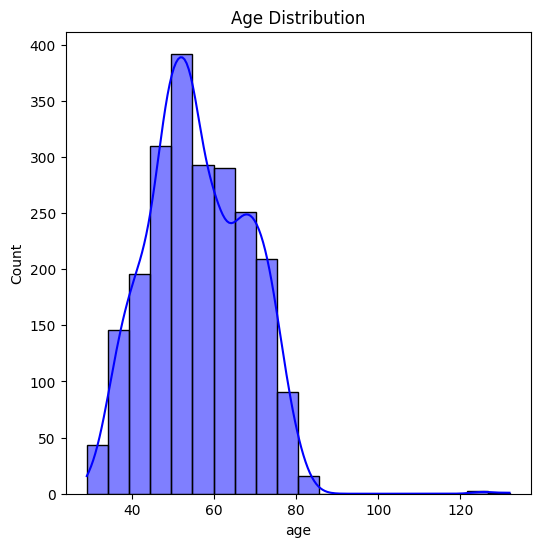

In [ ]:
# Age Distribution

plt.figure(figsize=(6, 6))
sns.histplot(df['age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.show()

<ipython-input-32-3243b3dc5fd8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education', data=df, palette='pastel', order=df['Education'].value_counts().index)


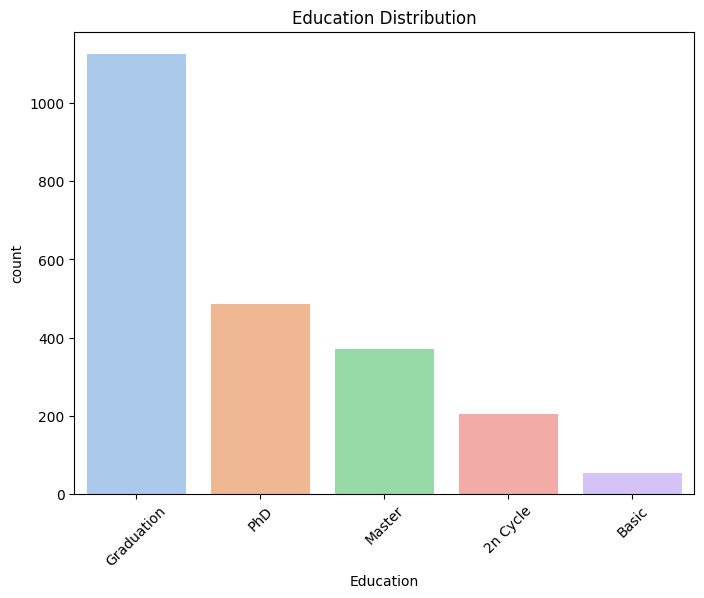

In [ ]:
# Education Distrubution

plt.figure(figsize=(8, 6))
sns.countplot(x='Education', data=df, palette='pastel', order=df['Education'].value_counts().index)
plt.title('Education Distribution')
plt.xticks(rotation=45)
plt.show()

<ipython-input-34-9fb3883cb6ac>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Marital_Status', data=df, palette='muted', order=df['Marital_Status'].value_counts().index)


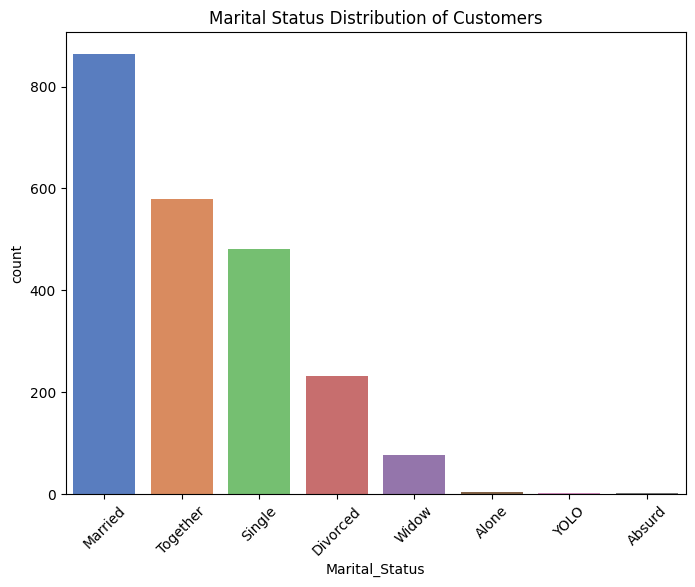

In [ ]:
# Marital status distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Marital_Status', data=df, palette='muted', order=df['Marital_Status'].value_counts().index)
plt.title('Marital Status Distribution of Customers')
plt.xticks(rotation=45)
plt.show()



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

## **Detailed Rport**

### ***1. Handling Missing Values:***

***Identifying Missing Values:*** The code begins by checking for missing values in each column using ***df.isnull().sum().***

***Imputation:*** The 'Income' column had missing values. These were filled using the median income of other customers with ***df['Income'].fillna(df['Income'].median(), inplace=True)***. The median was chosen as it's less sensitive to outliers compared to the mean.

### ***2. Ensuring Consistent Data Types:***

***Date Conversion:*** The 'Dt_Customer' column, representing the customer's enrollment date, was converted to datetime objects using ***df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')***. This ensures that the dates are treated as dates by Pandas, enabling date-based analysis.

***Age Calculation and Validation:*** The 'Year_Birth' was used to calculate customer age. A new 'age' column was created, and invalid ages (less than 18 or greater than 100) were identified and removed to maintain data integrity. This was accomplished using conditional selection.

### ***Explanation of Statistics:***

***count:*** The number of non-missing values for each variable.

***mean:*** The average value of the variable.

***std:*** The standard deviation, measuring the dispersion of data around the mean.

***min:*** The minimum value of the variable.

***25%:*** The first quartile (25th percentile).

***50%:*** The median (50th percentile).

***75%:*** The third quartile (75th percentile).

***max:*** The maximum value of the variable.

##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


In [ ]:
# Select numerical variable for analysis

key_variables = df.select_dtypes(include=['number']).columns
print("Numeric columns selected for analysis:", key_variables)

Numeric columns selected for analysis: Index(['Id', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Response', 'Complain', 'age'],
      dtype='object')


In [ ]:
# Calculate measures of central tendency and dispersion

measures = pd.DataFrame({'Mean': df[key_variables].mean(),
                         'Median': df[key_variables].median(),
                         'Mode': df[key_variables].mode().iloc[0],
                         'Variance': df[key_variables].var(),
                         'Standard Deviation': df[key_variables].std()})
print("Descriptive Statistics (Before Handling Outliers):\n", measures)

Descriptive Statistics (Before Handling Outliers):
                              Mean   Median     Mode      Variance  \
Id                    5592.159821   5458.5      0.0  1.054082e+07   
Year_Birth            1968.805804   1970.0   1976.0  1.436179e+02   
Income               52237.975446  51381.5  51381.5  6.268992e+08   
Kidhome                  0.444196      0.0      0.0  2.898725e-01   
Teenhome                 0.506250      0.0      0.0  2.965219e-01   
Recency                 49.109375     49.0     56.0  8.388237e+02   
MntWines               303.935714    173.5      2.0  1.132978e+05   
MntFruits               26.302232      8.0      0.0  1.581926e+03   
MntMeatProducts        166.950000     67.0      7.0  5.094743e+04   
MntFishProducts         37.525446     12.0      0.0  2.984325e+03   
MntSweetProducts        27.062946      8.0      0.0  1.704080e+03   
MntGoldProds            44.021875     24.0      1.0  2.721442e+03   
NumDealsPurchases        2.325000      2.0      1.0

### ***Identify and handle outliers using (IQR method & Box Plot).***

In [ ]:
# Identify outliers using the IQR method

outlier_info = {}
for col in key_variables:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  outlier_info[col] = len(outliers)
print("\nOutliers Count by Variable:\n", pd.Series(outlier_info))


Outliers Count by Variable:
 Id                       0
Year_Birth               3
Income                   8
Kidhome                  0
Teenhome                 0
Recency                  0
MntWines                35
MntFruits              227
MntMeatProducts        175
MntFishProducts        223
MntSweetProducts       248
MntGoldProds           207
NumDealsPurchases       86
NumWebPurchases          4
NumCatalogPurchases     23
NumStorePurchases        0
NumWebVisitsMonth        8
Response               334
Complain                21
age                      3
dtype: int64


In [ ]:
print(upper_bound)
print(lower_bound)

93.0
21.0


<Figure size 1200x800 with 0 Axes>

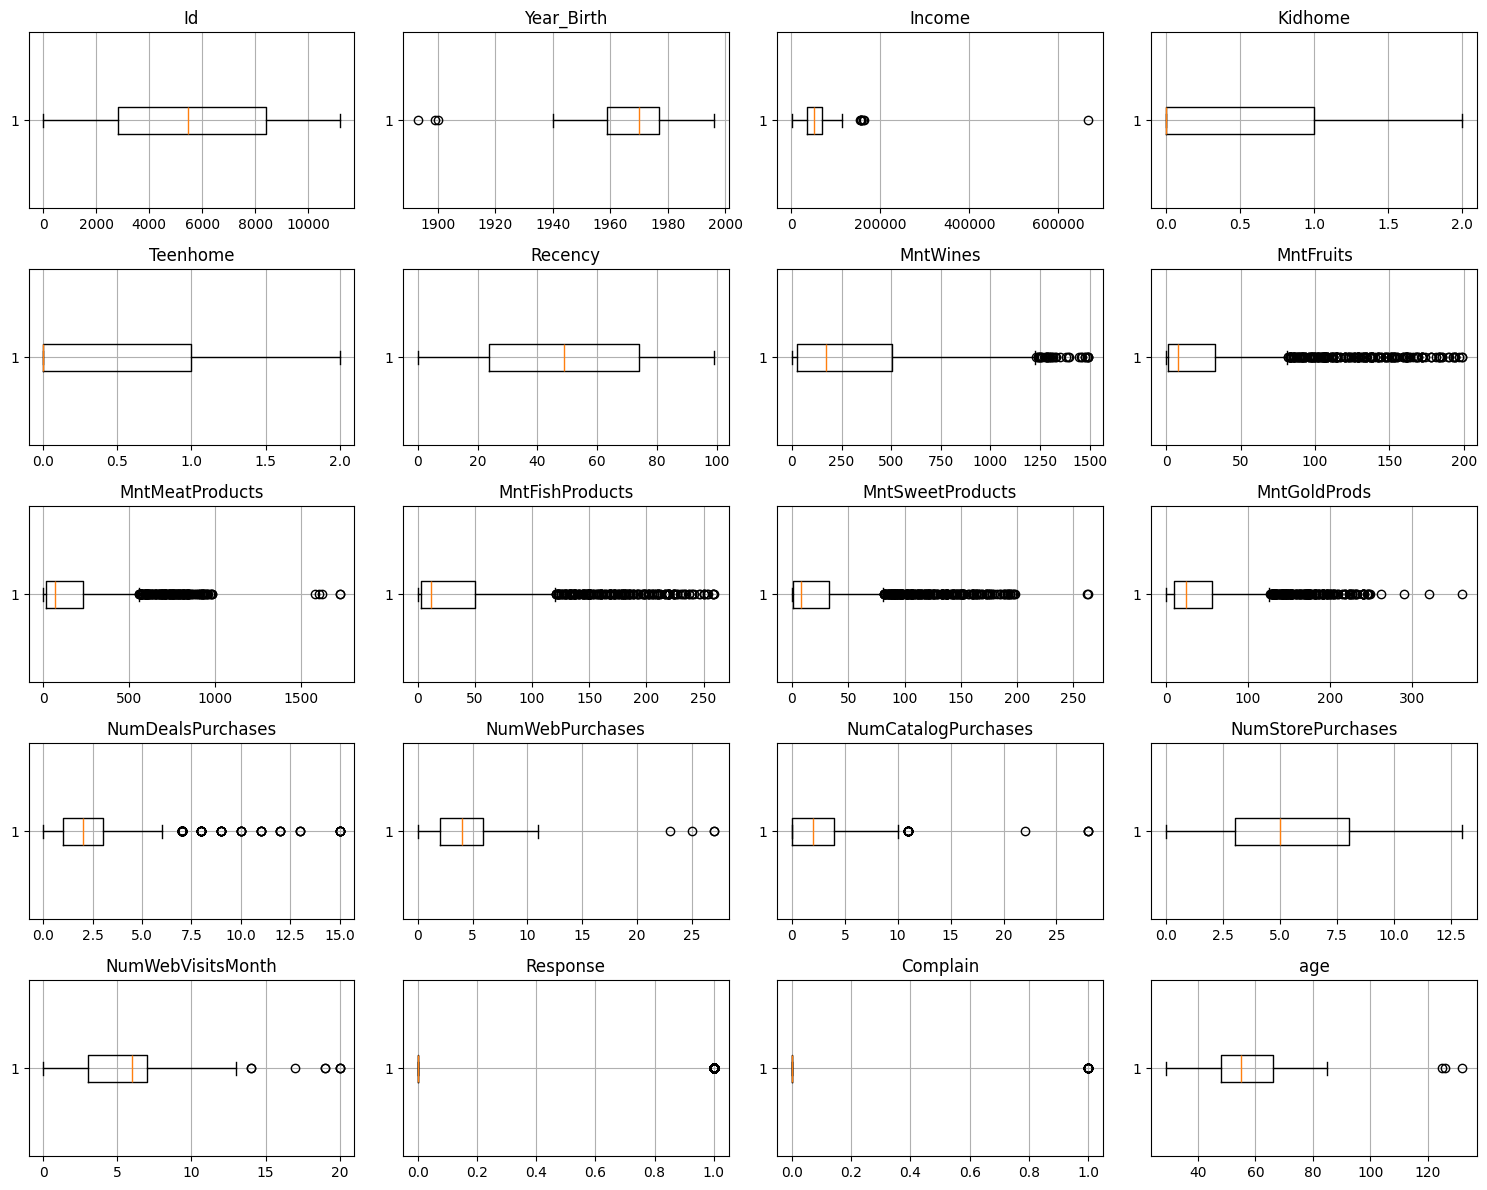

In [ ]:
# Create boxplots for outlier detection
plt.figure(figsize=(12, 8))
num_cols = len(key_variables)
# Calculate the number of rows needed to accommodate all subplots
num_rows = (num_cols + 3) // 4
# Adjust the figsize to better accommodate the plots
plt.figure(figsize=(15, 12))

# Loop through columns to create boxplots, ensuring 'i' stays within the subplot grid
for i, column in enumerate(key_variables, start=1):
    plt.subplot(num_rows, 4, i)  # Use num_rows for dynamic row allocation
    plt.boxplot(df[column].dropna(), vert=False)
    plt.title(column)
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Handle outliers: Replace extreme values with bounds

for col in key_variables:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

In [ ]:
# After handling outliers

outliers_info = {}
for col in key_variables:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  outliers_info[col] = len(outliers)
print("\nOutliers Count by Variable:\n", pd.Series(outliers_info))


Outliers Count by Variable:
 Id                     0
Year_Birth             0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
age                    0
dtype: int64


In [ ]:
# Recalculate statistics after handling outliers

key_variables_after_outliers = pd.DataFrame({'Mean': df[key_variables].mean(),
                                             'Median': df[key_variables].median(),
                                             'Mode': df[key_variables].mode().iloc[0],
                                             'Variance': df[key_variables].var(),
                                             'Standard Deviation': df[key_variables].std()})
print("\nDiscriptiive Statistics (After handling ourliers):\n", key_variables_after_outliers)


Discriptiive Statistics (After handling ourliers):
                              Mean   Median     Mode      Variance  \
Id                    5592.159821   5458.5      0.0  1.054082e+07   
Year_Birth            1968.852232   1970.0   1976.0  1.385735e+02   
Income               51865.874554  51381.5  51381.5  4.383205e+08   
Kidhome                  0.444196      0.0      0.0  2.898725e-01   
Teenhome                 0.506250      0.0      0.0  2.965219e-01   
Recency                 49.109375     49.0     56.0  8.388237e+02   
MntWines               302.112946    173.5      2.0  1.095990e+05   
MntFruits               21.679018      8.0      0.0  7.429630e+02   
MntMeatProducts        150.873214     67.0    556.0  3.197540e+04   
MntFishProducts         32.115848     12.0      0.0  1.629049e+03   
MntSweetProducts        21.937946      8.0      0.0  7.584700e+02   
MntGoldProds            39.487723     24.0    126.5  1.594206e+03   
NumDealsPurchases        2.215625      2.0      1.

**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



### ***Step-1. Identify Variables for Probability Distributions***

1. Binomial: Binary variables (e.g., Response, Complain).
2. Poisson: Count variables (e.g., NumWebPurchases, NumStorePurchases).
3. Normal: Continuous variables (e.g., Income, Recency).

### ***Step 2: Visualize the Distributions***

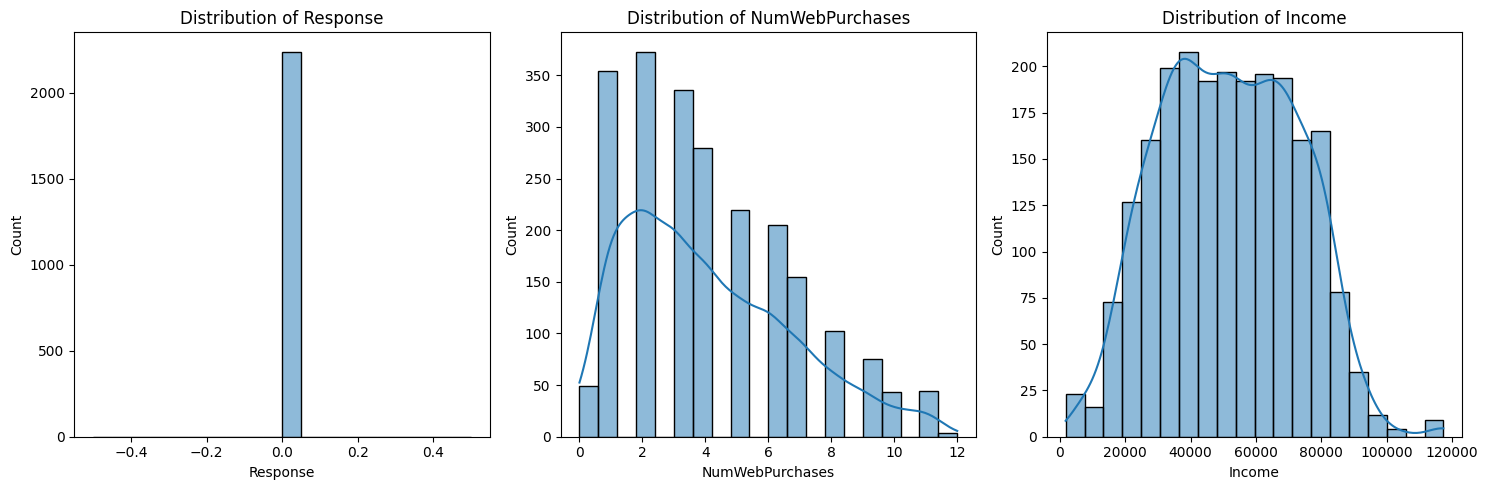

In [ ]:
# Plot distributions
variables = ['Response', 'NumWebPurchases', 'Income'] # Update with relevant columns

plt.figure(figsize=(15, 5))
for i, var in enumerate(variables, start=1):
    plt.subplot(1, len(variables), i)
    sns.histplot(df[var], kde=True, bins=20)
    plt.title(f"Distribution of {var}")
plt.tight_layout()
plt.show()

### ***Step 3: Calculate Probabilities and Expected Values***

Use appropriate probability distributions for analysis:

Binomial Distribution:

In [ ]:
from scipy.stats import binom

# Calculate the probability of Response = 1
p_response = df['Response'].mean()  # Success probability
prob_binomial = binom.pmf(1, n=1, p=p_response)
print(f"Probability of Response = 1: {prob_binomial}")

Probability of Response = 1: 0.0


Poisson Distribution:

In [ ]:
from scipy.stats import poisson

# Mean (lambda) of NumWebPurchases
lambda_poisson = df['NumWebPurchases'].mean()

# Probability of exactly 5 web purchases
prob_poisson = poisson.pmf(5, mu=lambda_poisson)
print(f"Probability of exactly 5 web purchases: {prob_poisson}")

Probability of exactly 5 web purchases: 0.1585934014560403


Normal Distribution:

In [ ]:
from scipy.stats import norm

# Probability of Income > 60,000
mean_income = df['Income'].mean()
std_income = df['Income'].std()
prob_normal = 1 - norm.cdf(60000, loc=mean_income, scale=std_income)
print(f"Probability of Income > 60,000: {prob_normal}")

Probability of Income > 60,000: 0.34881509806540567


## ***Derive Insights:***

1. If the probability of Response = 1 is low, you might need to refine marketing strategies for better engagement.

2. If higher-income groups have a greater probability of responding, focus campaigns on those groups.

3. Analyze purchase patterns (e.g., Poisson distribution for NumWebPurchases) to design better offers.

## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

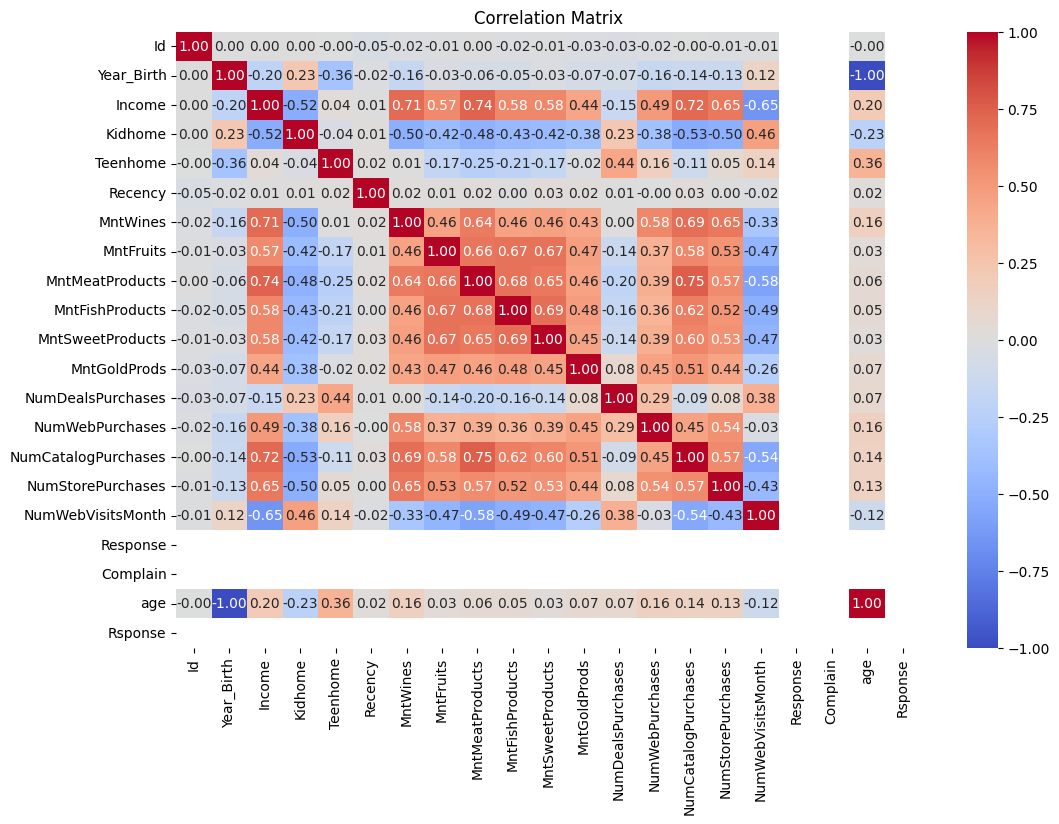

In [ ]:
# Corelation Analysis, Calculate corelation matrix

correlation_matrix = df.select_dtypes(include=['number']).corr()

# Visualize Correlations

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The correlation matrix visualizes the relationships between numerical variables in your dataset.

* **Diagonal:** The diagonal line of the matrix (from top-left to bottom-right) always shows a perfect correlation of 1. This is because each variable is perfectly correlated with itself.

**Interpreting Specific Relationships (you'll need to look at generated matrix for these values):**

Look for cells with high absolute correlation values (close to +1 or -1).  For example:

* **High Positive Correlation (e.g., Income and spending on various products):** If you see a strong positive correlation between `Income` and `MntWines` (amount spent on wine), it suggests that customers with higher incomes tend to spend more on wine.  This can inform your marketing strategies, targeting higher-income individuals with premium wine offers.

* **High Negative Correlation (less common in this type of data but possible):** A negative correlation might appear between `NumDealsPurchases` (number of purchases with discounts) and `Income`.  This might indicate that higher-income customers are less likely to use discounts, preferring regular prices or higher-value products.

* **Low or Near-Zero Correlation:**  Variables with low correlations suggest that they are not strongly related. For instance, if `Year_Birth` (or age, derived from it) has a low correlation with `NumWebVisitsMonth`, it means that a customer's age doesn't significantly predict how often they visit the website.

**Important Considerations:**

* **Correlation does not equal causation:** A strong correlation between two variables doesn't necessarily mean that one causes the other.  There could be a third, underlying variable influencing both.

* **Linearity:** Correlation measures *linear* relationships.  Two variables might have a strong non-linear relationship that correlation analysis would miss (e.g. an inverted U-shape).

* **Outliers:** Outliers can significantly impact correlation coefficients. The code you've provided attempts to handle outliers, but you might need to investigate any unusual data points further.

**Using the Matrix for Insights:**

1. **Focus on the target variable:** If you have a target variable (e.g. `Response` indicating customer acceptance of an offer), look at the correlations between `Response` and the other features.  This helps identify variables most strongly associated with customer response.

2. **Look for relationships between predictor variables:** See how your potential predictor variables relate to each other. If two variables are highly correlated, you might need to consider using only one of them in a model to avoid multicollinearity (where two predictor variables are so similar that they confuse a statistical model).


To provide you more specific guidance, I need the actual output of your correlation matrix.  Copy and paste the numerical results into our chat, and I can give you more targeted interpretations.


In [ ]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select Features for Clustering, Include revelvant columns

features = ['Income', 'age', 'MntWines', 'MntFruits', 'MntMeatProducts',
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumWebPurchases', 'NumStorePurchases', 'NumDealsPurchases']

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

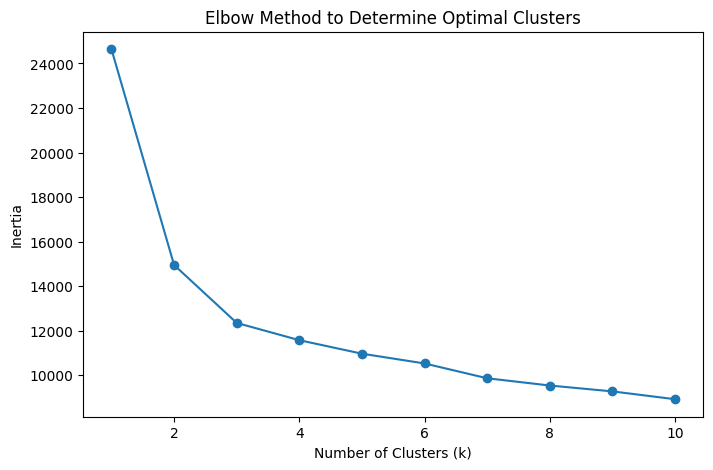

In [ ]:
# K-mean Clustering, Determine optimal number of clusters using the elbow method

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow-cruve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

- The code performs k-means clustering on a subset of features of your dataset (after scaling them). The plot produced visualizes the WCSS for k = 1 to 10. Look for the "elbow" point in the plot to suggest an optimal 'k'.  The 'k' at the elbow point represents the number of clusters that captures most of the variation in your data without creating too many clusters.


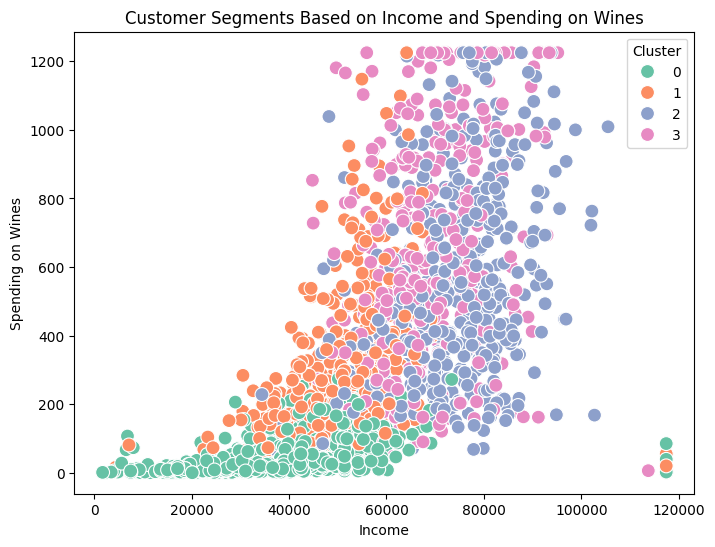

In [ ]:
# Apply K-Means with optimal

optimal_clusters = 4  # Choose based on the elbow method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Analyze cluster

cluster_mean = df.groupby('Cluster')[features].mean()

# Visualize cluster distribution for two key features

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Income', y='MntWines', hue='Cluster', palette='Set2', s=100)
plt.title("Customer Segments Based on Income and Spending on Wines")
plt.xlabel("Income")
plt.ylabel("Spending on Wines")
plt.legend(title="Cluster")
plt.show()

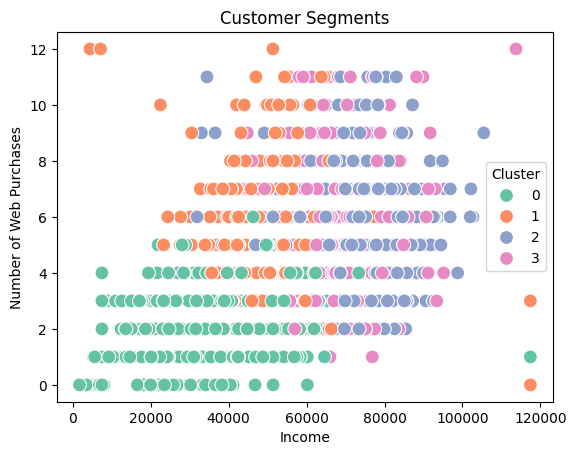

In [ ]:
sns.scatterplot(
    x=df['Income'], y=df['NumWebPurchases'],
    hue=df['Cluster'], palette='Set2', s=100
)
plt.title("Customer Segments")
plt.xlabel("Income")
plt.ylabel("Number of Web Purchases")
plt.legend(title="Cluster")
plt.show()


- **Scatter Plots:**  It creates scatter plots of key feature pairs (e.g., 'Income' vs. 'MntWines', 'Income' vs. 'NumWebPurchases'). Each point represents a customer, and the color of the point indicates its assigned cluster. This allows you to see how clusters are separated in the space defined by these two features.  You can visually see which clusters have higher income customers, higher spending on wine, or more online purchases.

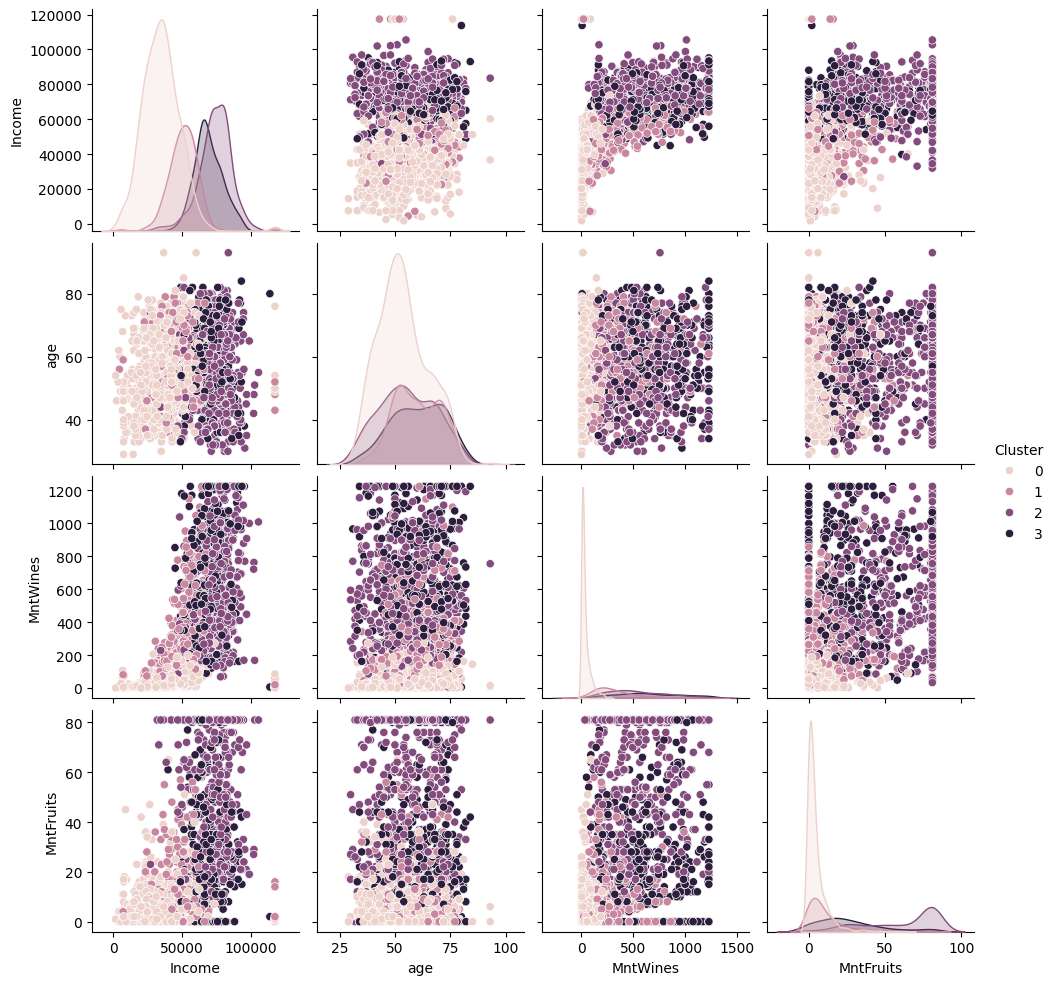

In [ ]:
# Visualize the clusters
sns.pairplot(df, hue='Cluster', vars=features[:4]) # Example with first 4 features
plt.show()

The code visualizes the clusters generated by KMeans clustering in several ways:

- **Pair Plot (sns.pairplot):** This generates a matrix of scatter plots showing the relationships between all pairs of selected features (in this case, the first four features in the `features` list).  The points are again colored by cluster, so you can see how the clusters are separated across all possible combinations of those four features.  This gives you a more holistic view of the clusters across multiple dimensions.


These visualizations help understand how the KMeans algorithm has grouped customers based on their characteristics.  You can see which features are most important in defining the clusters and look for patterns within each cluster.  For example, one cluster might have high income and high wine spending customers while another might have low income and fewer online purchases.


## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

Visualize key findings and create actionable recommendations

<ipython-input-97-431221986b73>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='viridis')


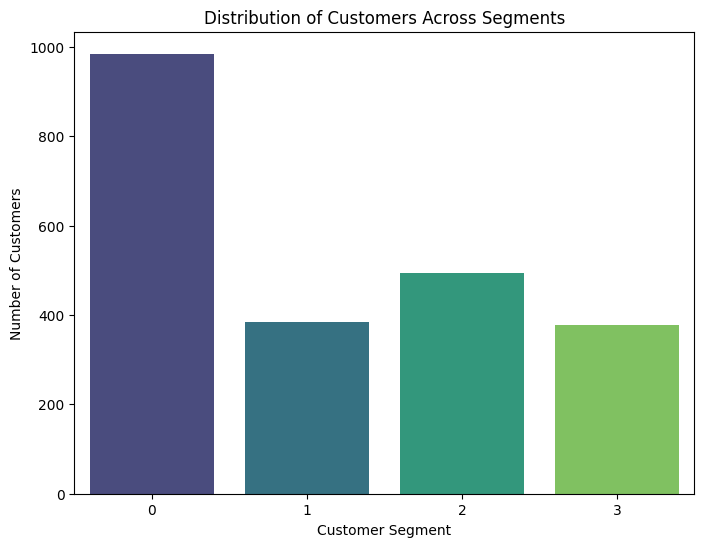

In [ ]:
# Customer Segmentation Visualization
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=df, palette='viridis')
plt.title('Distribution of Customers Across Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.show()

<ipython-input-99-2bd138394219>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cluster', y='MntWines', data=df, palette='magma', ci=None) # Example with 'MntWines'
<ipython-input-99-2bd138394219>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='MntWines', data=df, palette='magma', ci=None) # Example with 'MntWines'


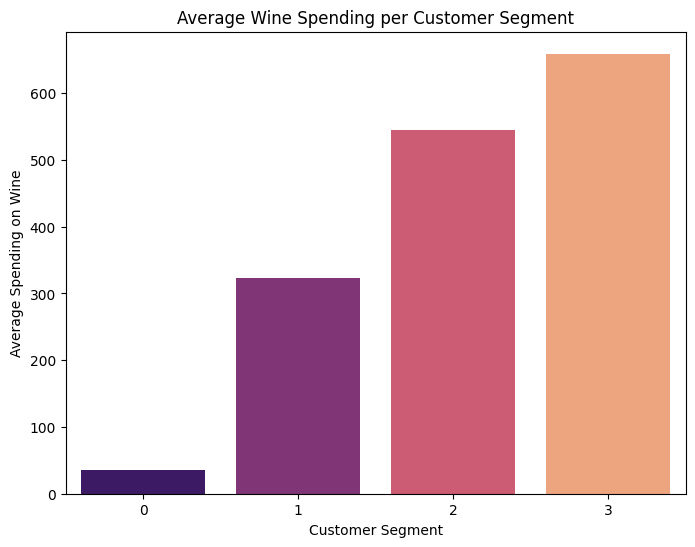

In [ ]:
# Spending Habits by Segment
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='MntWines', data=df, palette='magma', ci=None) # Example with 'MntWines'
plt.title('Average Wine Spending per Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Spending on Wine')
plt.show()


<ipython-input-102-54ede8ecf915>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cluster', y='NumWebPurchases', data=df, label='Web Purchases', color='skyblue', ci=None)
<ipython-input-102-54ede8ecf915>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cluster', y='NumStorePurchases', data=df, label='Store Purchases', color='coral', ci=None)


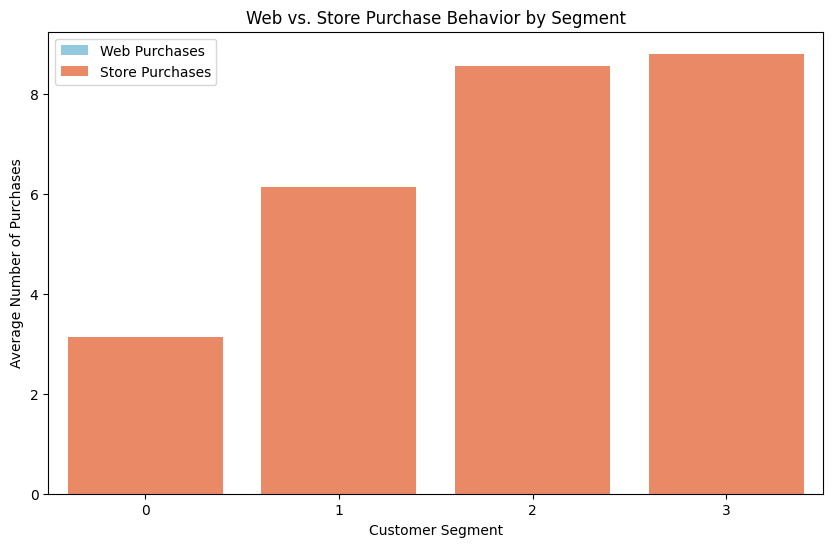

In [ ]:
# Web vs. Store Purchases by Segment
plt.figure(figsize=(10,6))
sns.barplot(x='Cluster', y='NumWebPurchases', data=df, label='Web Purchases', color='skyblue', ci=None)
sns.barplot(x='Cluster', y='NumStorePurchases', data=df, label='Store Purchases', color='coral', ci=None)
plt.title('Web vs. Store Purchase Behavior by Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Number of Purchases')
plt.legend()
plt.show()

## Recommendations:
Based on the customer segmentation analysis and visualized spending habits:

**Segment 1:**
- These customers exhibit average spending across various product categories.
- Target this segment with balanced promotional offers across product lines.
- Consider personalized recommendations based on their purchase history to enhance engagement.

**Segment 2:**
- These are potentially high-value customers with higher spending on various products.
- Offer loyalty programs, exclusive discounts, or premium services to retain them.
- Consider upselling or cross-selling complementary products.

**Segment 3:**
-  This segment has low spending. Targeted campaigns to boost their spending on various categories
- Analyze if these are new customers or those who have recently decreased their spending.
- Implement strategies to re-engage them with special promotions, targeted offers, or personalized recommendations.

**Segment 4:**
- This segment exhibits distinct spending patterns, with a higher proportion of online purchases.
- Focus on optimizing the online shopping experience and promotions specific to digital channels.
- Explore targeted online advertising campaigns.

**General Recommendations:**
- Implement a customer relationship management (CRM) system to personalize interactions and offers.
- Continuously monitor customer behavior and spending patterns to adapt strategies.
- Leverage A/B testing to evaluate the effectiveness of different marketing campaigns.

Overall Dataset Conclusion and Recommendations:
----------------------------------------
The analysis revealed distinct customer segments with varying spending habits and preferences.  Outlier handling improved the reliability of statistical measures. Correlation analysis highlighted key relationships between customer characteristics and spending, informing targeted marketing strategies.

Key Insights:
- Customer segments show diverse purchasing behaviors across product categories and channels.
- Income and spending patterns significantly influence segment characteristics.
- Some segments may respond better to specific marketing channels or promotional offers.

Actionable Recommendations:
- Implement personalized recommendations based on past purchase history for each segment.
- Develop tailored loyalty programs and exclusive discounts for high-value customers.
- Re-engagement strategies, such as special promotions and targeted offers, are needed for low-spending segments.
- Optimize online shopping experiences and promotions for digital-focused customers.
- Use A/B testing to evaluate campaign effectiveness and refine strategies continuously.
- Regularly monitor customer behavior and spending patterns to adapt strategies.
----------------------------------------

## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍